In [46]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
#Get the data
!git clone https://github.com/AhmadIbrahim-AI/data-scraping.git

%cd /content/data-scraping
! git pull 

fatal: destination path 'data-scraping' already exists and is not an empty directory.
/content/data-scraping
Already up to date.


In [48]:

import pandas as pd
import glob

path = '/content/data-scraping/User Reviews' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

reviews = pd.concat(li, axis=0, ignore_index=True)

In [49]:
reviews.shape

(83957, 4)

In [50]:
print(np.mean(reviews['USER SCORE']))

7.5554695316594405


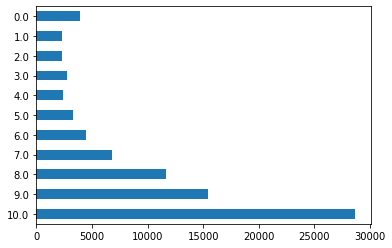

In [51]:
reviews['USER SCORE'].value_counts().sort_index(ascending=False).plot(kind='barh')

In [52]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83957 entries, 0 to 83956
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        83957 non-null  int64  
 1   Title         83957 non-null  object 
 2   User Reviews  83957 non-null  object 
 3   USER SCORE    83956 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [53]:
#text Cleaning
print(reviews['User Reviews'][20])

Keisha Castle-Hughes put all other child actors to shame in her dramatization of Paikea, a girl whose destiny as the leader of her people is constantly subverted by the traditional ideas of her grandfather. However, as awe-inspiring and inspirational as the story to "Whale Rider" is, director Niki Caro goes to unnecessary lengths to make sure you know why the movie was made, which detracts from the overall experience.


In [54]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
#pip install langdetect Language detection library ported from Google's language-detection.
from langdetect import detect

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

def clean_review(text):
  # convert to lower case
  text = text.lower()
  
  try:
     res = detect_langs(text)
     for item in res:
      if  item.lang != "en":
        text='deleted'
  except:
    text='deleted'

  # remove none alphabetic characters
  text = re.sub(r'[^a-z]', ' ', text)

  # stem words 
  # split into words
  tokens = word_tokenize(text)

  # stemming of words
  stemmed = [stemmer.stem(word) for word in tokens]

  text = ' '.join(stemmed)

  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in english_stopwords])


  return text

In [ ]:
# apply to all dataset
reviews['clean_review'] = reviews['User Reviews'].apply(clean_review)
reviews.head() 

In [69]:
reviews[reviews['clean_review']=='delet'].shape

(4437, 5)

In [72]:
reviews.drop(reviews[reviews['clean_review']=='delet'].index, inplace=True)
reviews.drop(reviews[reviews['clean_review']==''].index, inplace=True)

In [73]:
reviews

,Number,Title,User Reviews,USER SCORE,clean_review
0,1501,Whale Rider,Very dull and over dramatic.,3.0,veri dull dramat
1,1501,Whale Rider,I have never seen one and the same movie more...,10.0,never seen one movi twice theatr befor whale r...
2,1501,Whale Rider,"Mediocre at best. Dull, lifeless acting by al...",3.0,mediocr best dull lifeless act keisha castl hu...
3,1501,Whale Rider,"A very moving and spiritual film, I feel sorr...",10.0,veri move spiritu film feel sorri peopl gave p...
4,1501,Whale Rider,"I absolutely loved this movie, and thought it...",10.0,absolut love thi movi thought wa great drama c...
...,...,...,...,...,...
83952,2500,Young@Heart,Really quite good. Fix You is absolutely marv...,8.0,realli quit good fix absolut marvel bit slow t...
83953,2500,Young@Heart,I was astonished to see that this film is not...,10.0,wa astonish see thi film top list thi one film...
83954,2500,Young@Heart,I feel this movie has very limited appeal. If...,5.0,feel thi movi ha veri limit appeal like realit...
83955,2500,Young@Heart,Avant-garde composer/musician John Zorn said ...,6.0,avant gard compos musician john zorn said thi ...


In [74]:
#text Cleaning comparaision
print(reviews['User Reviews'][1],reviews['USER SCORE'][1])
print(reviews['clean_review'][1])

 I have never seen one and the same movie more than twice in the theatre before. But Whale Rider changed my mind. It really is a magnificent masterpiece and sureley made for the whole family. I watched it 7 times in the cinema and i am into it still today. Niki Caro was so lucky to find and choose this natural Keisha Castle Hughes. Very, very impressive the whole story and the actors and actresses. Everybody who really understand the plot of Whale Rider can't give less then 9 rating...! 10.0
never seen one movi twice theatr befor whale rider chang mind realli magnific masterpiec sureley made whole famili watch time cinema still today niki caro wa lucki find choos thi natur keisha castl hugh veri veri impress whole stori actor actress everybodi realli understand plot whale rider give less rate


In [75]:
#assign sentiment  based on user score Greater than 5 it will be considered as positive
reviews['sentiment'] = np.where((reviews['USER SCORE'] > 5), 1, 0)

In [76]:
reviews['sentiment'].value_counts()

1    63146
0    16368
Name: sentiment, dtype: int64

In [77]:
#Select equal reviews 
positive_reviews=reviews[(reviews['USER SCORE'] > 5)] .sample(n=16300)
negative_reviews=reviews[(reviews['USER SCORE'] <= 5)] .sample(n=16300)
selected_reviews=pd.concat([positive_reviews,negative_reviews], ignore_index=True)

In [78]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
 
X = selected_reviews['clean_review'].values
y = selected_reviews['sentiment'].values

# Split data into 50% training & 50% test
# let's all use a random state of 42 for example to ensure having the same split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(22820,) (22820,)
(9780,) (9780,)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

# define a CountVectorizer (with binary=True and max_features=20000)
vectorizer = CountVectorizer(binary=True, max_features=20000)  

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train)  

# transform x_train to bag of words
x_train_bow = vectorizer.transform(x_train)  
x_test_bow = vectorizer.transform(x_test)   

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_train_bow, y_train)
# print(X_res.shape, y_res.shape)
# print(x_test_bow.shape, y_test.shape)

In [81]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
model = LogisticRegression()

# train the classifier on the training data
model.fit(x_train_bow, y_train)

# get the mean accuracy on the training data
acc_train = model.score(x_train_bow, y_train)  

print('Training Accuracy:', acc_train)

Training Accuracy: 0.9577563540753725


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
# Evaluate model with test data

acc_test = model.score(x_test_bow, y_test)  
print('Test Accuracy:', acc_test)

Test Accuracy: 0.8551124744376278


In [83]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test_bow)
confusion_matrix(y_test, y_pred)

array([[4079,  742],
       [ 675, 4284]])

In [84]:
# define predict function
def predict(model, vectorizer, review):
    review = clean_review(review)
    review_bow = vectorizer.transform([review])
    return model.predict(review_bow)[0]

In [85]:
review ='''
I love Sparks but this is literally the worst movie I've ever seen and it's not even close.'''
predict(model, vectorizer, review)

0

In [87]:
review ='''
Masterpiece of Russell Crowe. Movie is very realistic to history. It is very well directed.
'''
predict(model, vectorizer, review)

1

In [88]:
#here where  bag of words model is not functioning well as context is not taken into consideration.
review ='''
This film is beautiful shot and very well acted, but unfortunately it's not very well directed and the script wears its heart on its sleeve. It's very melodramatic at times and comes across as pedestrian at best. Russell Crowe has left his mark as one of the world’s great actors, but unfortunately this film will not allow him the same luxury as a director.
'''
predict(model, vectorizer, review)

1